In [1]:
import numpy as np 
import pandas as pd 
import os 
import sys 

import librosa
import librosa.display
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
path = 'C:\\Users\\zhuld\\Dropbox\\EAV'
print(os.listdir(path))

['.ipynb_checkpoints', 'desktop.ini', 'GitHub_Codes', 'meta_data.csv', 'questionnaire.xlsx', 'subject1', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject19', 'subject2', 'subject20', 'subject21', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject28', 'subject29', 'subject3', 'subject30', 'subject31', 'subject32', 'subject33', 'subject34', 'subject35', 'subject36', 'subject37', 'subject38', 'subject39', 'subject4', 'subject40', 'subject41', 'subject42', 'subject5', 'subject6', 'subject7', 'subject8', 'subject9', 'temp_subjects.csv']


In [3]:
cnt = 0 
for sub in os.listdir(path):
    if sub[:7] == 'subject':
        for i in os.listdir(path+'/'+sub+'/Audio'):
            print(i)
            cnt += 1 

print(cnt)

002_Trial_02_Speaking_Neutral_Aud.wav
004_Trial_02_Speaking_Anger_aud.wav
006_Trial_02_Speaking_Anger_aud.wav
008_Trial_02_Speaking_Anger_aud.wav
010_Trial_02_Speaking_Anger_aud.wav
012_Trial_02_Speaking_Neutral_aud.wav
014_Trial_02_Speaking_Anger_aud.wav
016_Trial_02_Speaking_Anger_aud.wav
018_Trial_02_Speaking_Anger_aud.wav
020_Trial_02_Speaking_Anger_aud.wav
022_Trial_02_Speaking_Neutral_aud.wav
024_Trial_02_Speaking_Calmness_aud.wav
026_Trial_02_Speaking_Calmness_aud.wav
028_Trial_02_Speaking_Calmness_aud.wav
030_Trial_02_Speaking_Calmness_aud.wav
032_Trial_02_Speaking_Neutral_aud.wav
034_Trial_02_Speaking_Calmness_aud.wav
036_Trial_02_Speaking_Calmness_aud.wav
038_Trial_02_Speaking_Calmness_aud.wav
040_Trial_02_Speaking_Calmness_aud.wav
042_Trial_04_Speaking_Neutral_aud.wav
044_Trial_04_Speaking_Sadness_aud.wav
046_Trial_04_Speaking_Sadness_aud.wav
048_Trial_04_Speaking_Sadness_aud.wav
050_Trial_04_Speaking_Sadness_aud.wav
052_Trial_04_Speaking_Neutral_aud.wav
054_Trial_04_Speakin

In [4]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [5]:
file_emotion = []
file_path = []
subjects = []


for sub in os.listdir(path):
    if sub[:7] == 'subject':
        for i in os.listdir(path+'/'+sub+'/Audio'):
            emotion = i.split('_')[4]
            file_emotion.append(emotion)
            file_path.append(path+'/'+sub+'/Audio/'+i)
            subjects.append(sub)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])
path_df = pd.DataFrame(file_path, columns=['Path'])
subjects_df = pd.DataFrame(subjects, columns=['Subject']) 
df = pd.concat([subjects_df, emotion_df, path_df], axis=1)
df

,Subject,Emotion,Path
0,subject1,Neutral,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/002_...
1,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/004_...
2,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/006_...
3,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/008_...
4,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/010_...
...,...,...,...
4195,subject9,Neutral,C:\Users\zhuld\Dropbox\EAV/subject9/Audio/192_...
4196,subject9,Sadness,C:\Users\zhuld\Dropbox\EAV/subject9/Audio/194_...
4197,subject9,Sadness,C:\Users\zhuld\Dropbox\EAV/subject9/Audio/196_...
4198,subject9,Sadness,C:\Users\zhuld\Dropbox\EAV/subject9/Audio/198_...


In [8]:
df.loc[df['Subject']=='subject2']

,Subject,Emotion,Path
1100,subject2,Neutral,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/002_...
1101,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/004_...
1102,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/006_...
1103,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/008_...
1104,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/010_...
...,...,...,...
1195,subject2,Neutral,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/192_...
1196,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/194_...
1197,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/196_...
1198,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/198_...


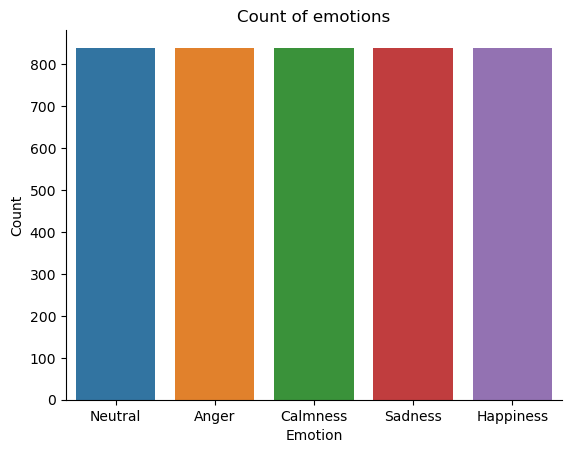

In [6]:
plt.title('Count of emotions')
sns.countplot(data=df, x='Emotion')
plt.ylabel('Count')
#plt.xlabel('Emotions')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [7]:
import re 

def extract_number(s): 
    return int(re.search(r'\d+', s).group())

df['numeric_part'] = df['Subject'].apply(extract_number)
df.sort_values('numeric_part', inplace=True)
df.drop('numeric_part', axis=1, inplace=True)

df

,Subject,Emotion,Path
0,subject1,Neutral,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/002_...
72,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/146_...
71,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/144_...
70,subject1,Neutral,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/142_...
69,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/140_...
...,...,...,...
3628,subject42,Sadness,C:\Users\zhuld\Dropbox\EAV/subject42/Audio/058...
3627,subject42,Sadness,C:\Users\zhuld\Dropbox\EAV/subject42/Audio/056...
3626,subject42,Sadness,C:\Users\zhuld\Dropbox\EAV/subject42/Audio/054...
3636,subject42,Anger,C:\Users\zhuld\Dropbox\EAV/subject42/Audio/074...


In [8]:
df.head(200)

,Subject,Emotion,Path
0,subject1,Neutral,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/002_...
72,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/146_...
71,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/144_...
70,subject1,Neutral,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/142_...
69,subject1,Anger,C:\Users\zhuld\Dropbox\EAV/subject1/Audio/140_...
...,...,...,...
1128,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/058_...
1127,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/056_...
1137,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/076_...
1101,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/004_...


In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [10]:
df['Emotion'].unique()

array(['Neutral', 'Anger', 'Sadness', 'Happiness', 'Calmness'],
      dtype=object)

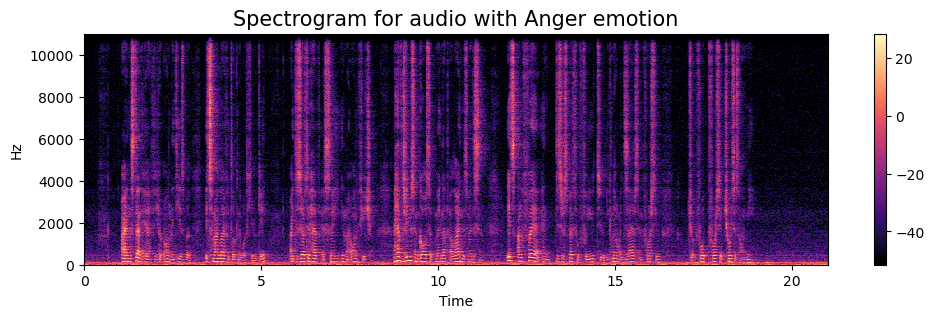

In [14]:
emotion = 'Anger'
path = np.array(df[df['Emotion']==emotion]['Path'])[1]
#print(path)
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
#Audio(path)
#print(data)
#print(sampling_rate)

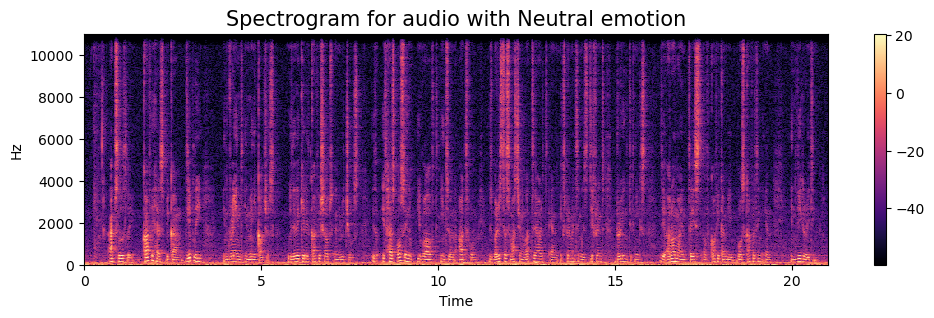

In [15]:
emotion = 'Neutral'
path = np.array(df[df['Emotion']==emotion]['Path'])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

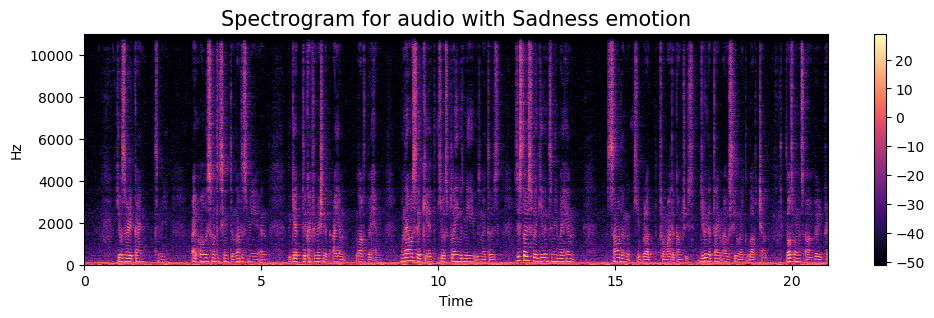

In [28]:
emotion = 'Sadness'
path = np.array(df[df['Emotion']==emotion]['Path'])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

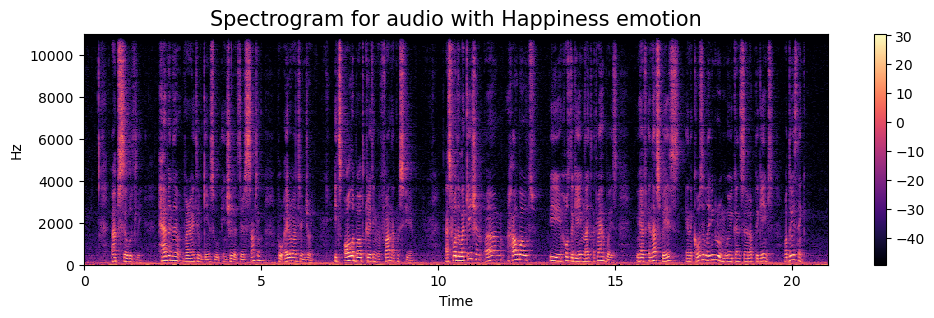

In [29]:
emotion = 'Happiness'
path = np.array(df[df['Emotion']==emotion]['Path'])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

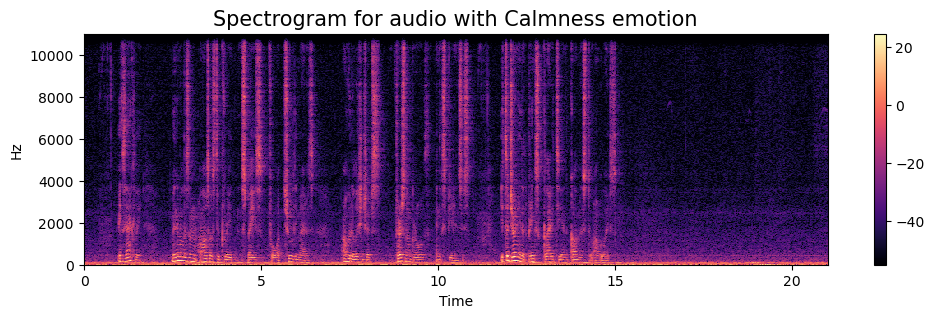

In [32]:
emotion = 'Calmness'
path = np.array(df[df['Emotion']==emotion]['Path'])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [33]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data 

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

In [11]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    #zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    #result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    #rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    #result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=19, offset=1)
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


# Subject 2 

### Other approach 

In [9]:
def extract_features(data, sample_rate):
    result = np.array([])

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=19, offset=1)
    
    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    return result



In [10]:
def divide_into_segments (path, seg_dur_seconds = 5):
    data, sr = librosa.load(path)
    #print(sr)
    segment_length = sr * seg_dur_seconds
    num_sections = int(np.floor(len(data) / segment_length))
    split = []
    for i in range(num_sections):
        t = data[i * segment_length: (i + 1) * segment_length]
        split.append(t)
    return split, sr # we need this sample rate further 

In [43]:
seg, sr = divide_into_segments(df.Path[0]) # 4 by 110250 array 
print(type(extract_features(seg[1], 22100)))
print(sr)

<class 'numpy.ndarray'>
22050


In [11]:
X_train, X_test, y_train, y_test = [], [], [], []

for sub, path, emotion in zip(df.Subject, df.Path, df.Emotion):
    split, sr = divide_into_segments(path) # split is 4 x N array, so we need to extract features from every row 

    feature = np.array([])
    for row in split: 
        if len(feature) == 0:
            feature = extract_features(row, sr)
        else: 
            feature = np.vstack((feature, extract_features(row, sr)))
        
    for ele in feature:
        if sub == 'subject2':
            X_test.append(ele)
            y_test.append(emotion)

        else: 
            X_train.append(ele)
            y_train.append(emotion)

In [12]:
# test data should be of shape 400 x num_of_features 
len(X_test[0]), len(y_test)

(160, 400)

In [13]:
len(X_train), len(y_train)

(16400, 16400)

In [17]:
import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
train_Features = pd.DataFrame(X_train)
train_Features['labels'] = y_train
train_Features.to_csv('train_features_subject2.csv', index=False)
train_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.652284,0.645084,0.673426,0.734397,0.717149,0.681890,0.641882,0.662883,0.679078,0.746698,...,0.000530,0.000513,0.000918,0.000630,0.000894,0.000862,0.000692,0.000707,5.285343e-05,Neutral
1,0.650286,0.570528,0.570465,0.652575,0.586977,0.617949,0.627604,0.627652,0.618624,0.677548,...,0.000499,0.000461,0.000603,0.000313,0.000451,0.000511,0.000398,0.000321,3.703215e-05,Neutral
2,0.668053,0.661022,0.693179,0.648984,0.618249,0.587794,0.627320,0.669097,0.743673,0.750627,...,0.000273,0.000288,0.000356,0.000165,0.000364,0.000292,0.000235,0.000197,1.828851e-05,Neutral
3,0.723289,0.748554,0.813805,0.841540,0.833131,0.787478,0.776052,0.797007,0.844701,0.956321,...,0.000102,0.000042,0.000036,0.000026,0.000024,0.000018,0.000023,0.000012,8.208668e-07,Neutral
4,0.648017,0.629224,0.630104,0.604578,0.581562,0.674782,0.621383,0.622847,0.606365,0.661351,...,0.000083,0.000097,0.000223,0.000089,0.000192,0.000128,0.000087,0.000087,9.754970e-06,Anger


In [16]:
train_Features = pd.read_csv('train_features_subject2.csv')
train_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.652284,0.645084,0.673426,0.734397,0.717149,0.681890,0.641882,0.662883,0.679078,0.746698,...,0.000530,0.000513,0.000918,0.000630,0.000894,0.000862,0.000692,0.000707,5.285343e-05,Neutral
1,0.650286,0.570528,0.570465,0.652575,0.586977,0.617949,0.627604,0.627652,0.618624,0.677548,...,0.000499,0.000461,0.000603,0.000313,0.000451,0.000511,0.000398,0.000321,3.703215e-05,Neutral
2,0.668053,0.661022,0.693179,0.648984,0.618249,0.587794,0.627320,0.669097,0.743673,0.750627,...,0.000273,0.000288,0.000356,0.000165,0.000364,0.000292,0.000235,0.000197,1.828851e-05,Neutral
3,0.723289,0.748554,0.813805,0.841540,0.833131,0.787478,0.776052,0.797007,0.844701,0.956321,...,0.000102,0.000042,0.000036,0.000026,0.000024,0.000018,0.000023,0.000012,8.208668e-07,Neutral
4,0.648017,0.629224,0.630104,0.604578,0.581562,0.674782,0.621383,0.622847,0.606365,0.661351,...,0.000083,0.000097,0.000223,0.000089,0.000192,0.000128,0.000087,0.000087,9.754970e-06,Anger


In [17]:
test_Features = pd.DataFrame(X_test)
test_Features['labels'] = y_test
test_Features.to_csv('test_features_subject2.csv', index=False)
test_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.600849,0.575461,0.554333,0.593721,0.574689,0.594668,0.635938,0.646429,0.630813,0.606263,...,0.011351,0.004399,0.001434,0.003393,0.002732,0.011902,0.008045,0.001428,0.000125,Anger
1,0.562184,0.596061,0.558448,0.483561,0.451636,0.498818,0.530213,0.450939,0.492825,0.549699,...,0.017988,0.005314,0.017556,0.017000,0.008983,0.017355,0.007027,0.002797,0.000439,Anger
2,0.609853,0.570263,0.628961,0.623826,0.536799,0.526453,0.474892,0.473877,0.495795,0.520224,...,0.010507,0.003478,0.008025,0.011845,0.006903,0.015523,0.008093,0.002007,0.000330,Anger
3,0.628250,0.587880,0.608131,0.558200,0.505137,0.565743,0.584080,0.530429,0.548377,0.568879,...,0.003365,0.001388,0.002931,0.002884,0.001268,0.002058,0.001359,0.000782,0.000197,Anger
4,0.668249,0.651627,0.659424,0.627760,0.573897,0.538976,0.540233,0.539341,0.557283,0.581458,...,0.036660,0.011666,0.005323,0.004602,0.005597,0.016665,0.010106,0.003572,0.000464,Anger


In [18]:
test_Features = pd.read_csv('test_features_subject2.csv')
test_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.600849,0.575461,0.554333,0.593721,0.574689,0.594668,0.635938,0.646429,0.630813,0.606263,...,0.011351,0.004399,0.001434,0.003393,0.002732,0.011902,0.008045,0.001428,0.000125,Anger
1,0.562184,0.596061,0.558448,0.483561,0.451636,0.498818,0.530213,0.450939,0.492825,0.549699,...,0.017988,0.005314,0.017556,0.017000,0.008983,0.017355,0.007027,0.002797,0.000439,Anger
2,0.609853,0.570263,0.628961,0.623826,0.536799,0.526453,0.474892,0.473877,0.495795,0.520224,...,0.010507,0.003478,0.008025,0.011845,0.006903,0.015523,0.008093,0.002007,0.000330,Anger
3,0.628250,0.587880,0.608131,0.558200,0.505137,0.565743,0.584080,0.530429,0.548377,0.568879,...,0.003365,0.001388,0.002931,0.002884,0.001268,0.002058,0.001359,0.000782,0.000197,Anger
4,0.668249,0.651627,0.659424,0.627760,0.573897,0.538976,0.540233,0.539341,0.557283,0.581458,...,0.036660,0.011666,0.005323,0.004602,0.005597,0.016665,0.010106,0.003572,0.000464,Anger


In [19]:
X_train = train_Features.iloc[:, :-1].values
y_train = train_Features['labels'].values

X_test = test_Features.iloc[:, :-1].values
y_test = test_Features['labels'].values

encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [20]:
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
# shuffle training data 
X_train = X_train[indices]
y_train = y_train[indices]

In [21]:
indices

array([ 8803, 13020,  4788, ..., 11715,  7574, 16211])

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16400, 160), (16400, 5), (400, 160), (400, 5))

In [24]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, X_test.shape

((16400, 160, 1), (400, 160, 1))

# model 1 

In [25]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(8)))
#model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                        bias_regularizer=regularizers.l2(1e-4),
                        activity_regularizer=regularizers.l2(1e-5)))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 160, 256)          1536      
                                                                 
 conv1d_1 (Conv1D)           (None, 160, 128)          163968    
                                                                 
 dropout (Dropout)           (None, 160, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 128)           82048     
                                                                 
 dropout_1 (Dropout)         (None, 20, 128)           0         
                                                        

In [26]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
129/129 [==============================] - 8s 11ms/step - loss: 1.4307 - accuracy: 0.3829 - val_loss: 1.6396 - val_accuracy: 0.3275 - lr: 0.0010
Epoch 2/100
129/129 [==============================] - 1s 9ms/step - loss: 1.3171 - accuracy: 0.4273 - val_loss: 1.6532 - val_accuracy: 0.3225 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2502 - accuracy: 0.4605 - val_loss: 1.8909 - val_accuracy: 0.3425 - lr: 0.0010
Epoch 4/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2085 - accuracy: 0.4756 - val_loss: 1.6237 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 5/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1807 - accuracy: 0.4952 - val_loss: 1.8789 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 6/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1430 - accuracy: 0.5129 - val_loss: 1.9651 - val_accuracy: 0.3175 - lr: 0.0010
Epoch 7/100
129/129 [==============================] - 1s 9ms/s

13/13 [==============================] - 0s 4ms/step - loss: 2.8041 - accuracy: 0.3325
Accuracy of the model on test data :  33.250001072883606 %


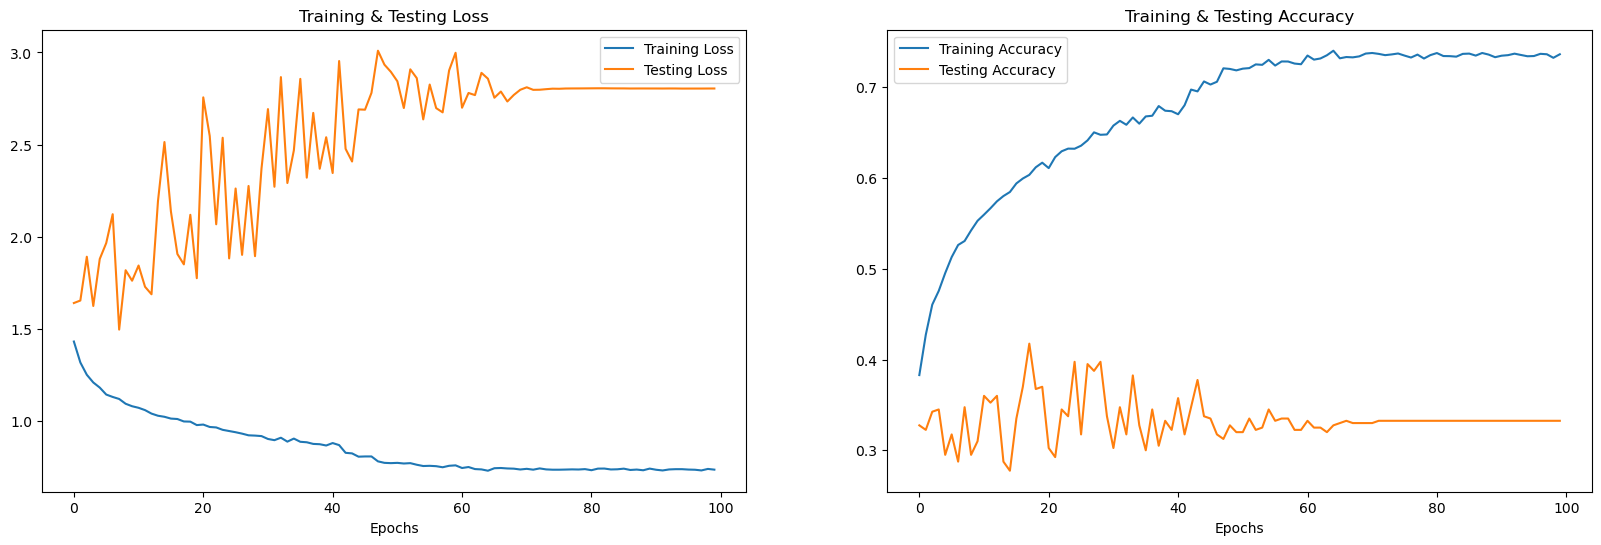

In [27]:
print("Accuracy of the model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [28]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

preds = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
preds['Predicted Labels'] = y_pred.flatten()
preds['Actual Labels'] = y_test.flatten()

#preds.iloc[:,0].value_counts(), preds.iloc[:, 1].value_counts()
preds

13/13 [==============================] - 0s 10ms/step


,Predicted Labels,Actual Labels
0,Happiness,Anger
1,Anger,Anger
2,Anger,Anger
3,Anger,Anger
4,Anger,Anger
...,...,...
395,Anger,Anger
396,Calmness,Neutral
397,Happiness,Neutral
398,Anger,Neutral


In [29]:
preds.iloc[:,0].value_counts(), preds.iloc[:, 1].value_counts()

(Predicted Labels
 Anger        222
 Happiness     95
 Calmness      36
 Neutral       24
 Sadness       23
 Name: count, dtype: int64,
 Actual Labels
 Anger        80
 Neutral      80
 Sadness      80
 Happiness    80
 Calmness     80
 Name: count, dtype: int64)

<bound method NDFrame.head of           Anger Calmness Happiness Neutral Sadness
Anger        74        0         5       1       0
Calmness     14       17        36       7       6
Happiness    62        0        18       0       0
Neutral      21       14        24      14       7
Sadness      51        5        12       2      10>
['Anger', 'Calmness', 'Happiness', 'Neutral', 'Sadness']


<Figure size 1200x1000 with 0 Axes>

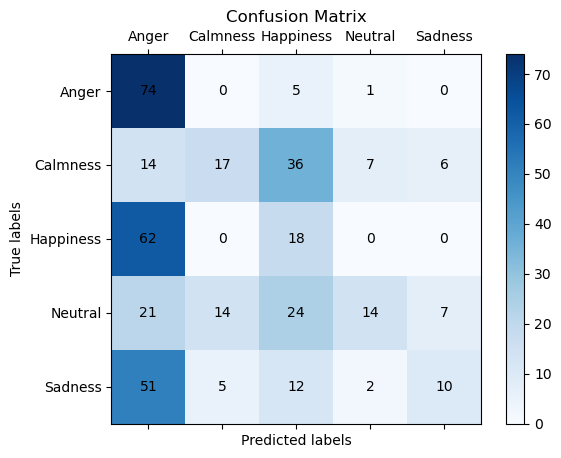

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
print(cm.head)

labels = []

for i in encoder.categories_[0]:
    labels.append(i)

print(labels)

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')  # You can choose your own colormap (e.g., 'Blues', 'coolwarm', etc.)
plt.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

In [110]:
model.save('audio_sub2.h5py')

INFO:tensorflow:Assets written to: audio_sub2.h5py\assets


INFO:tensorflow:Assets written to: audio_sub2.h5py\assets


In [109]:
df.loc[df['Subject']=='subject2']

,Subject,Emotion,Path
1166,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/134_...
1167,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/136_...
1168,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/138_...
1173,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/148_...
1170,subject2,Neutral,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/142_...
...,...,...,...
1128,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/058_...
1127,subject2,Sadness,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/056_...
1137,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/076_...
1101,subject2,Anger,C:\Users\zhuld\Dropbox\EAV/subject2/Audio/004_...


# Subject 6

In [71]:
X_train, X_test, y_train, y_test = [], [], [], []

for sub, path, emotion in zip(df.Subject, df.Path, df.Emotion):
    split, sr = divide_into_segments(path) # split is 4 x N array, so we need to extract features from every row 

    feature = np.array([])
    for row in split: 
        if len(feature) == 0:
            feature = extract_features(row, sr)
        else: 
            feature = np.vstack((feature, extract_features(row, sr)))
        
    for ele in feature:
        if sub == 'subject6':
            X_test.append(ele)
            y_test.append(emotion)

        else: 
            X_train.append(ele)
            y_train.append(emotion)

In [72]:
train_Features = pd.DataFrame(X_train)
train_Features['labels'] = y_train
train_Features.to_csv('train_features_subject6.csv', index=False)
train_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.652284,0.645084,0.673426,0.734397,0.717149,0.681890,0.641882,0.662883,0.679078,0.746698,...,0.000530,0.000513,0.000918,0.000630,0.000894,0.000862,0.000692,0.000707,5.285343e-05,Neutral
1,0.650286,0.570528,0.570465,0.652575,0.586977,0.617949,0.627604,0.627652,0.618624,0.677548,...,0.000499,0.000461,0.000603,0.000313,0.000451,0.000511,0.000398,0.000321,3.703215e-05,Neutral
2,0.668053,0.661022,0.693179,0.648984,0.618249,0.587794,0.627320,0.669097,0.743673,0.750627,...,0.000273,0.000288,0.000356,0.000165,0.000364,0.000292,0.000235,0.000197,1.828851e-05,Neutral
3,0.723289,0.748554,0.813805,0.841540,0.833131,0.787478,0.776052,0.797007,0.844701,0.956321,...,0.000102,0.000042,0.000036,0.000026,0.000024,0.000018,0.000023,0.000012,8.208668e-07,Neutral
4,0.648017,0.629224,0.630104,0.604578,0.581562,0.674782,0.621383,0.622847,0.606365,0.661351,...,0.000083,0.000097,0.000223,0.000089,0.000192,0.000128,0.000087,0.000087,9.754970e-06,Anger


In [73]:
test_Features = pd.DataFrame(X_test)
test_Features['labels'] = y_test
test_Features.to_csv('test_features_subject6.csv', index=False)
test_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.589444,0.495674,0.464074,0.486808,0.479631,0.532280,0.567702,0.558127,0.599873,0.651265,...,0.003053,0.001521,0.001175,0.000538,0.000251,0.001142,0.001604,0.000818,0.000083,Happiness
1,0.606249,0.591637,0.560689,0.524769,0.534689,0.612948,0.526626,0.464591,0.513144,0.562466,...,0.001620,0.001822,0.001368,0.001086,0.000386,0.001608,0.001908,0.001306,0.000095,Happiness
2,0.569574,0.513933,0.513981,0.537741,0.544082,0.556587,0.508366,0.502154,0.581048,0.636900,...,0.003445,0.001489,0.000675,0.000472,0.000238,0.000594,0.000573,0.000569,0.000052,Happiness
3,0.582450,0.514585,0.508673,0.486796,0.505164,0.600107,0.587030,0.551251,0.551461,0.534197,...,0.002380,0.001202,0.000876,0.000437,0.000267,0.000524,0.000853,0.000797,0.000090,Happiness
4,0.667058,0.672617,0.643795,0.595135,0.548591,0.521075,0.509936,0.488561,0.565409,0.666835,...,0.002430,0.000793,0.001222,0.000517,0.000508,0.000646,0.000882,0.002121,0.000079,Anger


In [81]:
X_train = train_Features.iloc[:, :-1].values
y_train = train_Features['labels'].values

X_test = test_Features.iloc[:, :-1].values
y_test = test_Features['labels'].values

encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
# shuffle training data 
X_train = X_train[indices]
y_train = y_train[indices]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16400, 160, 1), (16400, 5), (400, 160, 1), (400, 5))

### I will try to modify the model to prevent overfitting 

In [86]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(8)))
#model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                        bias_regularizer=regularizers.l2(1e-4),
                        activity_regularizer=regularizers.l2(1e-5)))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 160, 256)          1536      
                                                                 
 conv1d_28 (Conv1D)          (None, 160, 128)          163968    
                                                                 
 dropout_14 (Dropout)        (None, 160, 128)          0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 20, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 20, 128)           82048     
                                                                 
 dropout_15 (Dropout)        (None, 20, 128)           0         
                                                      

In [87]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
129/129 [==============================] - 2s 12ms/step - loss: 1.4326 - accuracy: 0.3758 - val_loss: 1.3323 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 2/100
129/129 [==============================] - 1s 9ms/step - loss: 1.3238 - accuracy: 0.4295 - val_loss: 1.1701 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2659 - accuracy: 0.4523 - val_loss: 1.2396 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 4/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2223 - accuracy: 0.4747 - val_loss: 1.1669 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1924 - accuracy: 0.4891 - val_loss: 1.2538 - val_accuracy: 0.4200 - lr: 0.0010
Epoch 6/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1714 - accuracy: 0.4957 - val_loss: 1.1226 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 7/100
129/129 [==============================] - 1s 9ms/s

13/13 [==============================] - 0s 12ms/step - loss: 0.9127 - accuracy: 0.6500
Accuracy of the model on test data :  64.99999761581421 %


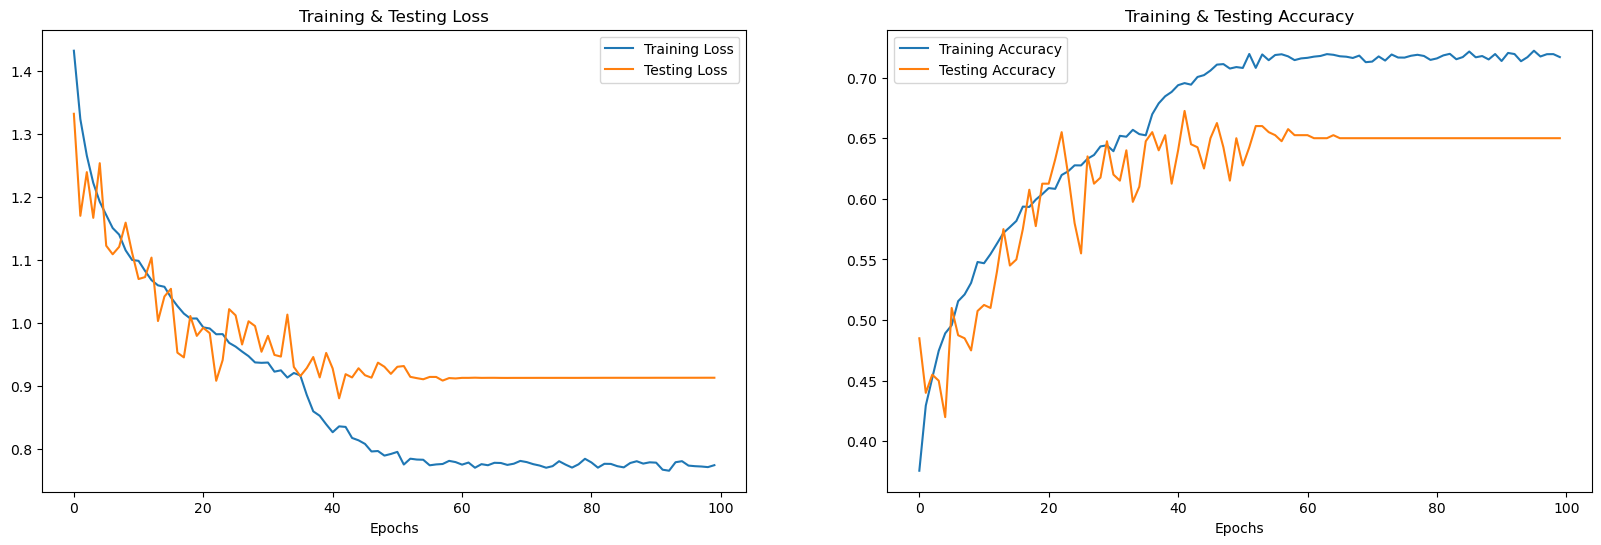

In [88]:
print("Accuracy of the model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [89]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

preds = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
preds['Predicted Labels'] = y_pred.flatten()
preds['Actual Labels'] = y_test.flatten()

preds.iloc[:,0].value_counts(), preds.iloc[:, 1].value_counts()

13/13 [==============================] - 0s 10ms/step


(Predicted Labels
 Anger        93
 Sadness      93
 Neutral      88
 Calmness     73
 Happiness    53
 Name: count, dtype: int64,
 Actual Labels
 Happiness    80
 Anger        80
 Neutral      80
 Sadness      80
 Calmness     80
 Name: count, dtype: int64)

<bound method NDFrame.head of           Anger Calmness Happiness Neutral Sadness
Anger        73        0         5       1       1
Calmness      1       41         3      16      19
Happiness    19        2        45      10       4
Neutral       0       26         0      43      11
Sadness       0        4         0      18      58>
['Anger', 'Calmness', 'Happiness', 'Neutral', 'Sadness']


<Figure size 1200x1000 with 0 Axes>

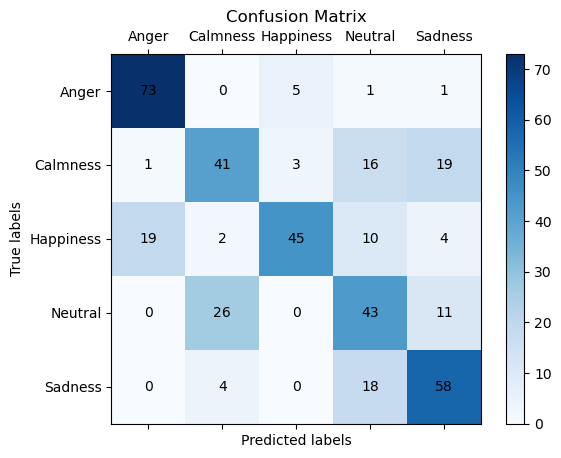

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
print(cm.head)

labels = []

for i in encoder.categories_[0]:
    labels.append(i)

print(labels)

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')  # You can choose your own colormap (e.g., 'Blues', 'coolwarm', etc.)
plt.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

In [91]:
model.save('audio_sub6.h5py')

INFO:tensorflow:Assets written to: audio_sub6.h5py\assets


INFO:tensorflow:Assets written to: audio_sub6.h5py\assets


# Subject 1

In [111]:
X_train, X_test, y_train, y_test = [], [], [], []

for sub, path, emotion in zip(df.Subject, df.Path, df.Emotion):
    split, sr = divide_into_segments(path) # split is 4 x N array, so we need to extract features from every row 

    feature = np.array([])
    for row in split: 
        if len(feature) == 0:
            feature = extract_features(row, sr)
        else: 
            feature = np.vstack((feature, extract_features(row, sr)))
        
    for ele in feature:
        if sub == 'subject1':
            X_test.append(ele)
            y_test.append(emotion)

        else: 
            X_train.append(ele)
            y_train.append(emotion)

In [112]:
train_Features = pd.DataFrame(X_train)
train_Features['labels'] = y_train
train_Features.to_csv('train_features_subject1.csv', index=False)
train_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.600849,0.575461,0.554333,0.593721,0.574689,0.594668,0.635938,0.646429,0.630813,0.606263,...,0.011351,0.004399,0.001434,0.003393,0.002732,0.011902,0.008045,0.001428,0.000125,Anger
1,0.562184,0.596061,0.558448,0.483561,0.451636,0.498818,0.530213,0.450939,0.492825,0.549699,...,0.017988,0.005314,0.017556,0.017000,0.008983,0.017355,0.007027,0.002797,0.000439,Anger
2,0.609853,0.570263,0.628961,0.623826,0.536799,0.526453,0.474892,0.473877,0.495795,0.520224,...,0.010507,0.003478,0.008025,0.011845,0.006903,0.015523,0.008093,0.002007,0.000330,Anger
3,0.628250,0.587880,0.608131,0.558200,0.505137,0.565743,0.584080,0.530429,0.548377,0.568879,...,0.003365,0.001388,0.002931,0.002884,0.001268,0.002058,0.001359,0.000782,0.000197,Anger
4,0.668249,0.651627,0.659424,0.627760,0.573897,0.538976,0.540233,0.539341,0.557283,0.581458,...,0.036660,0.011666,0.005323,0.004602,0.005597,0.016665,0.010106,0.003572,0.000464,Anger


In [113]:
test_Features = pd.DataFrame(X_test)
test_Features['labels'] = y_test
test_Features.to_csv('test_features_subject6.csv', index=False)
test_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,labels
0,0.652284,0.645084,0.673426,0.734397,0.717149,0.681890,0.641882,0.662883,0.679078,0.746698,...,0.000530,0.000513,0.000918,0.000630,0.000894,0.000862,0.000692,0.000707,5.285343e-05,Neutral
1,0.650286,0.570528,0.570465,0.652575,0.586977,0.617949,0.627604,0.627652,0.618624,0.677548,...,0.000499,0.000461,0.000603,0.000313,0.000451,0.000511,0.000398,0.000321,3.703215e-05,Neutral
2,0.668053,0.661022,0.693179,0.648984,0.618249,0.587794,0.627320,0.669097,0.743673,0.750627,...,0.000273,0.000288,0.000356,0.000165,0.000364,0.000292,0.000235,0.000197,1.828851e-05,Neutral
3,0.723289,0.748554,0.813805,0.841540,0.833131,0.787478,0.776052,0.797007,0.844701,0.956321,...,0.000102,0.000042,0.000036,0.000026,0.000024,0.000018,0.000023,0.000012,8.208668e-07,Neutral
4,0.648017,0.629224,0.630104,0.604578,0.581562,0.674782,0.621383,0.622847,0.606365,0.661351,...,0.000083,0.000097,0.000223,0.000089,0.000192,0.000128,0.000087,0.000087,9.754970e-06,Anger


In [114]:
X_train = train_Features.iloc[:, :-1].values
y_train = train_Features['labels'].values

X_test = test_Features.iloc[:, :-1].values
y_test = test_Features['labels'].values

encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
# shuffle training data 
X_train = X_train[indices]
y_train = y_train[indices]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16400, 160, 1), (16400, 5), (400, 160, 1), (400, 5))

In [115]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(8)))
#model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                        bias_regularizer=regularizers.l2(1e-4),
                        activity_regularizer=regularizers.l2(1e-5)))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 160, 256)          1536      
                                                                 
 conv1d_34 (Conv1D)          (None, 160, 128)          163968    
                                                                 
 dropout_20 (Dropout)        (None, 160, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 20, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 20, 128)           82048     
                                                                 
 dropout_21 (Dropout)        (None, 20, 128)           0         
                                                      

In [116]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
129/129 [==============================] - 2s 12ms/step - loss: 1.4272 - accuracy: 0.3800 - val_loss: 1.4321 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 2/100
129/129 [==============================] - 1s 9ms/step - loss: 1.3121 - accuracy: 0.4270 - val_loss: 1.3884 - val_accuracy: 0.3775 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2541 - accuracy: 0.4591 - val_loss: 1.3999 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 4/100
129/129 [==============================] - 1s 9ms/step - loss: 1.2104 - accuracy: 0.4798 - val_loss: 1.4048 - val_accuracy: 0.4325 - lr: 0.0010
Epoch 5/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1769 - accuracy: 0.4972 - val_loss: 1.4452 - val_accuracy: 0.4425 - lr: 0.0010
Epoch 6/100
129/129 [==============================] - 1s 9ms/step - loss: 1.1586 - accuracy: 0.5049 - val_loss: 1.3937 - val_accuracy: 0.4425 - lr: 0.0010
Epoch 7/100
129/129 [==============================] - 1s 9ms/s

13/13 [==============================] - 0s 12ms/step - loss: 1.7305 - accuracy: 0.4025
Accuracy of the model on test data :  40.25000035762787 %


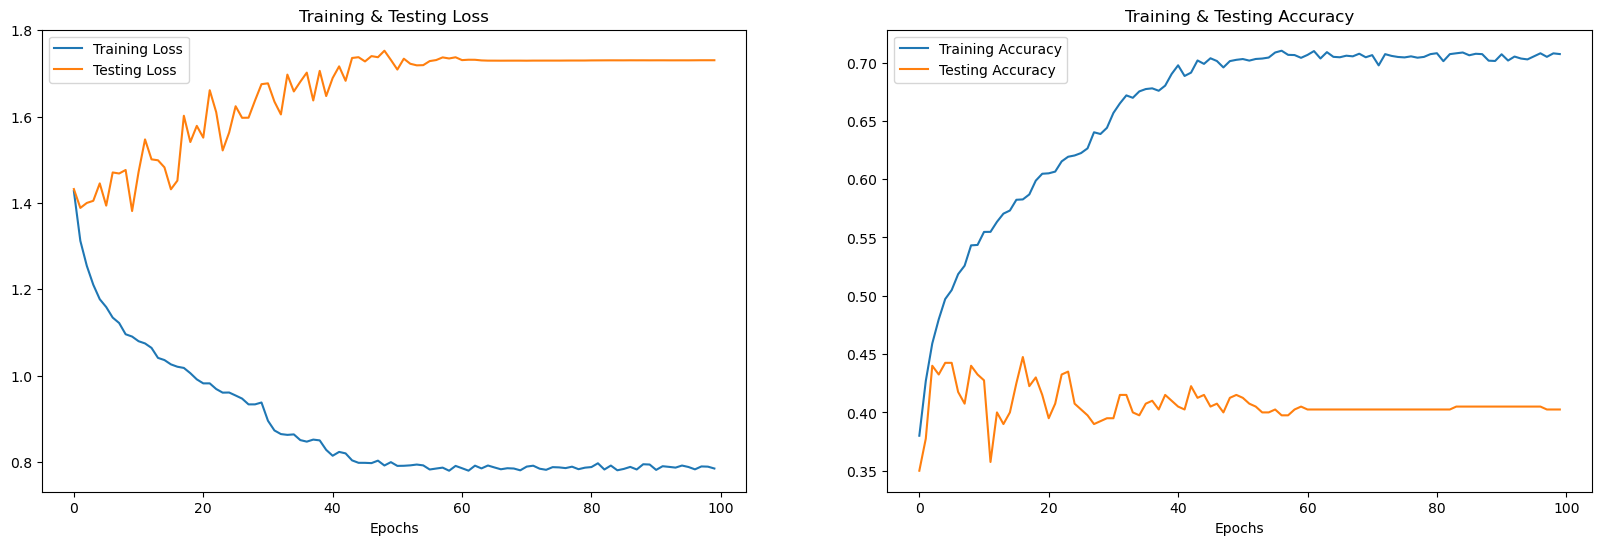

In [117]:
print("Accuracy of the model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [119]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

preds = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
preds['Predicted Labels'] = y_pred.flatten()
preds['Actual Labels'] = y_test.flatten()

preds.iloc[:,0].value_counts(), preds.iloc[:, 1].value_counts()

13/13 [==============================] - 0s 9ms/step


(Predicted Labels
 Neutral      149
 Sadness       86
 Calmness      75
 Happiness     71
 Anger         19
 Name: count, dtype: int64,
 Actual Labels
 Neutral      80
 Anger        80
 Sadness      80
 Happiness    80
 Calmness     80
 Name: count, dtype: int64)

<bound method NDFrame.head of           Anger Calmness Happiness Neutral Sadness
Anger        12        7        23      19      19
Calmness      0       26         0      34      20
Happiness     7        4        39      20      10
Neutral       0       23         0      52       5
Sadness       0       15         9      24      32>
['Anger', 'Calmness', 'Happiness', 'Neutral', 'Sadness']


<Figure size 1200x1000 with 0 Axes>

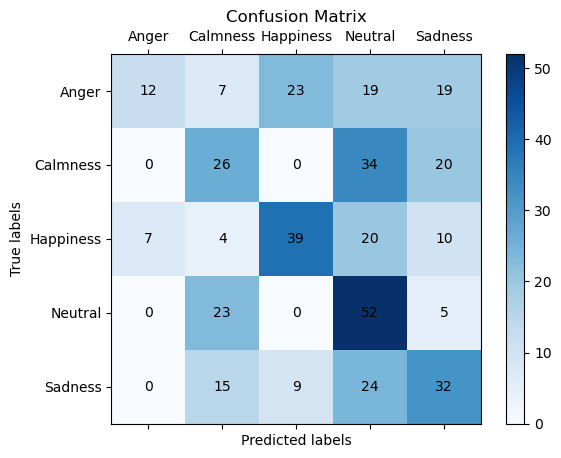

In [120]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
print(cm.head)

labels = []

for i in encoder.categories_[0]:
    labels.append(i)

print(labels)

fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')  # You can choose your own colormap (e.g., 'Blues', 'coolwarm', etc.)
plt.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()